In [233]:
import uproot
import awkward as ak
import vector
import matplotlib.pyplot as plt
import math

In [234]:
# Recibe la dirección del root. Retorna un DataFrame con la información del evento.

def Data(File_name, treename):
    if isinstance(File_name, str) and isinstance(treename, str):
        upfile = uproot.open(File_name)
        data = pd.DataFrame(upfile[treename].arrays(library="np"))
        return data
    else:
        print("File_name y treename deben ser strings")
        return None


In [235]:
# Carga el archivo NanoAOD
datos = Data('Datos/Roots/NanoAOD_1000.root','Events')

In [184]:
# Carga el archivo NanoAOD
file = uproot.open('Datos/Roots/NanoAOD_1000.root')
tree = file["Events"]

# Carga ramas de jets
jets = ak.zip({
    "pt": tree["Jet_pt"].array(),
    "eta": tree["Jet_eta"].array(),
    "phi": tree["Jet_phi"].array(),
    "mass": tree["Jet_mass"].array(),
    "btag": tree["Jet_btagDeepB"].array()  # puedes cambiarlo según el NanoAOD version
}, with_name="Momentum4D")

mask = ak.num(jets) >= 4
jets = jets[mask]

sorted_jets = jets[ak.argsort(jets.btag, axis=-1, ascending=False)]

bjets = sorted_jets[:, :2]

wjets = sorted_jets[:, 2:]

wjets = wjets[ak.argsort(wjets.pt, axis=-1, ascending=False)][:,:2]

In [217]:
ttbar = []
for i in range(len(jets)):
    top1 = bjets[i][0].mass + wjets[i][0].mass
    top2 = bjets[i][1].mass + wjets[i][1].mass
    ttbar.append(top1 + top2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


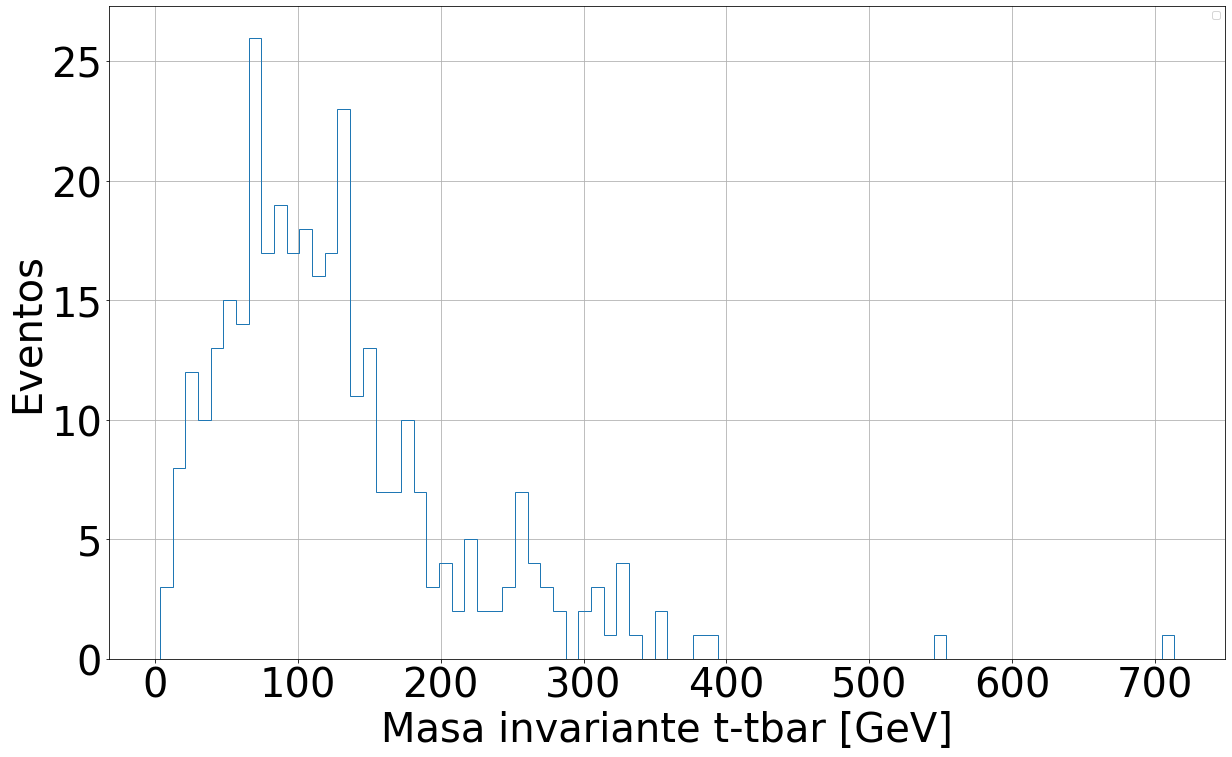

In [270]:
import numpy as np
import awkward as ak

# Función para calcular la masa invariante
def invariant_mass(pt1, eta1, phi1, mass1, pt2, eta2, phi2, mass2):
    # Convertimos pt, eta, phi a energía y momentos
    E1 = np.sqrt(pt1**2 + mass1**2)
    E2 = np.sqrt(pt2**2 + mass2**2)
    
    p1_x = pt1 * np.cos(phi1)
    p1_y = pt1 * np.sin(phi1)
    p1_z = pt1 * np.sinh(eta1)
    
    p2_x = pt2 * np.cos(phi2)
    p2_y = pt2 * np.sin(phi2)
    p2_z = pt2 * np.sinh(eta2)
    
    # Suma de energías y momentos
    E_tot = E1 + E2
    p_tot_x = p1_x + p2_x
    p_tot_y = p1_y + p2_y
    p_tot_z = p1_z + p2_z
    
    # Calculamos la masa invariante
    m_ttbar = np.sqrt(E_tot**2 - (p_tot_x**2 + p_tot_y**2 + p_tot_z**2))
    
    return m_ttbar

# Supongamos que tienes las variables pt, eta, phi y masa para cada jet en bjets y wjets
m_ttbar = invariant_mass(bjets.pt[:, 0], bjets.eta[:, 0], bjets.phi[:, 0], bjets.mass[:, 0],
                         wjets.pt[:, 0], wjets.eta[:, 0], wjets.phi[:, 0], wjets.mass[:, 0])

# Ahora puedes graficar la masa invariante ttbar
plt.figure(figsize=(20,12))
plt.hist(ak.to_numpy(m_ttbar), bins=80, histtype="step")
plt.xlabel("Masa invariante t-tbar [GeV]",fontsize = 40)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
plt.ylabel("Eventos",fontsize = 40)
plt.legend()
plt.grid(True)
plt.show()


In [240]:
for k in datos.keys():
    print(k)

run
luminosityBlock
event
HTXS_Higgs_pt
HTXS_Higgs_y
HTXS_stage1_1_cat_pTjet25GeV
HTXS_stage1_1_cat_pTjet30GeV
HTXS_stage1_1_fine_cat_pTjet25GeV
HTXS_stage1_1_fine_cat_pTjet30GeV
HTXS_stage1_2_cat_pTjet25GeV
HTXS_stage1_2_cat_pTjet30GeV
HTXS_stage1_2_fine_cat_pTjet25GeV
HTXS_stage1_2_fine_cat_pTjet30GeV
HTXS_stage_0
HTXS_stage_1_pTjet25
HTXS_stage_1_pTjet30
HTXS_njets25
HTXS_njets30
btagWeight_CSVV2
btagWeight_CMVA
CaloMET_phi
CaloMET_pt
CaloMET_sumEt
ChsMET_phi
ChsMET_pt
ChsMET_sumEt
nCorrT1METJet
CorrT1METJet_area
CorrT1METJet_eta
CorrT1METJet_muonSubtrFactor
CorrT1METJet_phi
CorrT1METJet_rawPt
DeepMETResolutionTune_phi
DeepMETResolutionTune_pt
DeepMETResponseTune_phi
DeepMETResponseTune_pt
nElectron
Electron_dEscaleDown
Electron_dEscaleUp
Electron_dEsigmaDown
Electron_dEsigmaUp
Electron_deltaEtaSC
Electron_dr03EcalRecHitSumEt
Electron_dr03HcalDepth1TowerSumEt
Electron_dr03TkSumPt
Electron_dr03TkSumPtHEEP
Electron_dxy
Electron_dxyErr
Electron_dz
Electron_dzErr
Electron_eCorr
Electron

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


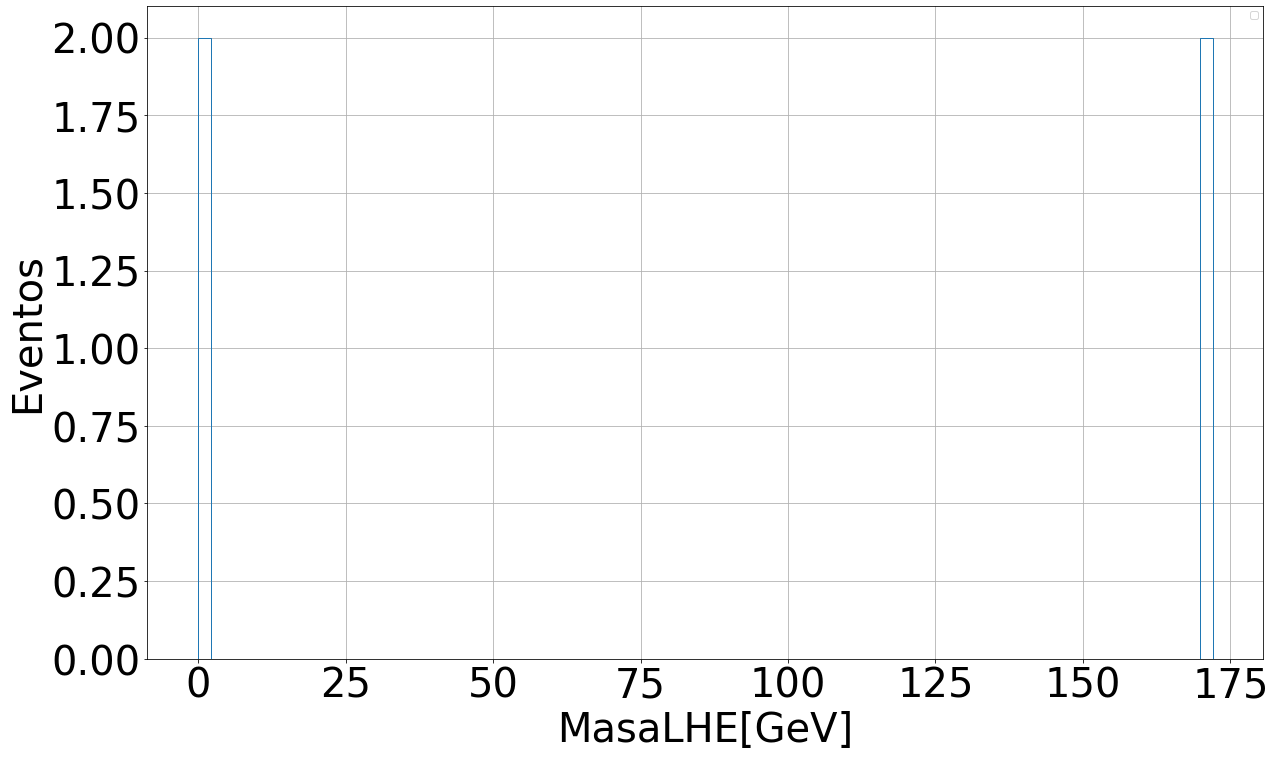

In [267]:
# Ahora puedes graficar la masa invariante ttbar
plt.figure(figsize=(20,12))
plt.hist(datos['LHEPart_mass'], bins=80, histtype="step")
plt.xlabel("MasaLHE[GeV]",fontsize = 40)
plt.ylabel("Eventos",fontsize = 40)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


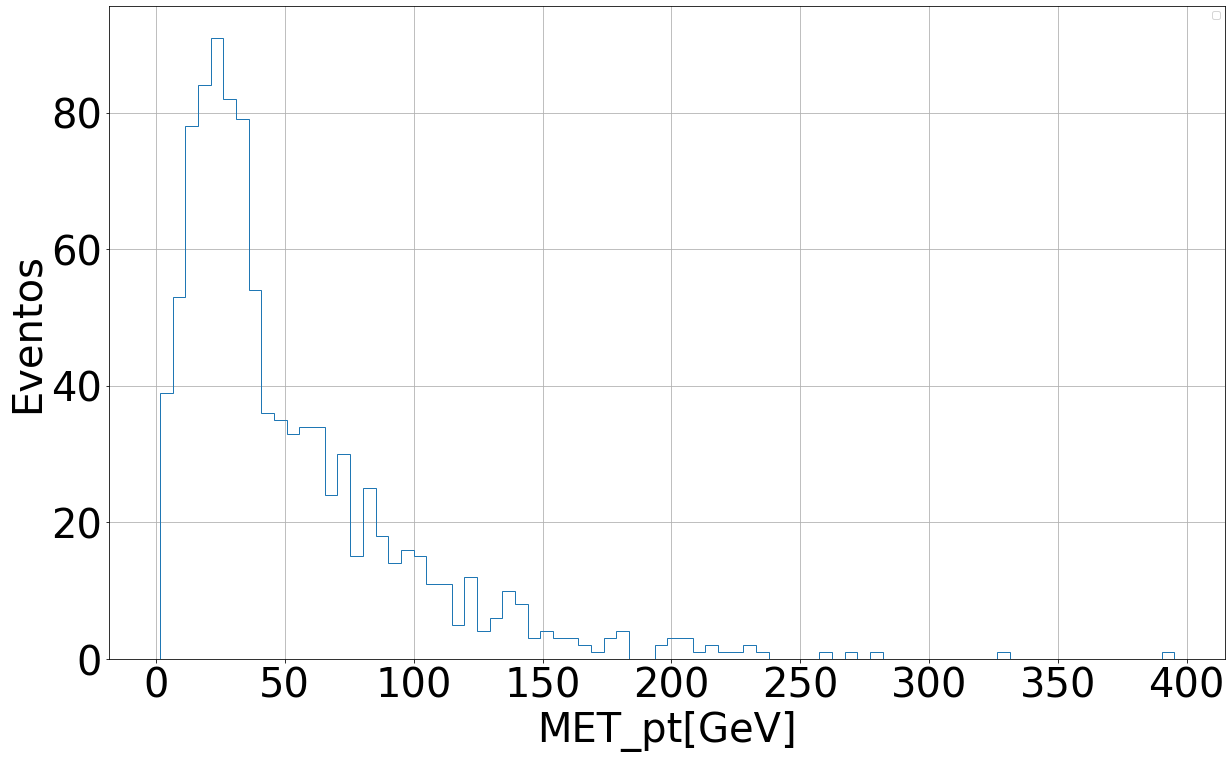

In [269]:
# Ahora puedes graficar la masa invariante ttbar
plt.figure(figsize=(20,12))
plt.hist(datos['MET_pt'], bins=80, histtype="step")
plt.xlabel("MET_pt[GeV]",fontsize = 40)
plt.ylabel("Eventos",fontsize = 40)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
plt.legend()
plt.grid(True)
plt.show()